In [41]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_excel('./datasets/LFR2023_SectionI.xlsx', sheet_name='I3', skiprows=6)
dataset = df.copy()
dataset

,Unnamed: 0,Unnamed: 1,Total,Less Than 1 Year,1 Year to Less Than 5\nYears,5 Years to Less Than\n10 Years,10 Years to Less\nThan 20 Years,At Least 20 Years
0,Total,2013.0,1697.9,307.5,591.8,333.9,284.9,179.8
1,NaN,2014.0,1744.3,355.0,585.0,326.6,290.4,187.4
2,NaN,2015.0,1797.0,333.5,626.3,344.0,296.2,196.9
3,NaN,2016.0,1807.0,319.2,646.9,348.9,294.5,197.5
4,NaN,2017.0,1806.9,284.3,646.3,358.8,315.3,202.2
5,NaN,2018.0,1845.7,303.8,636.7,357.7,341.5,206.0
6,NaN,2019.0,1883.9,316.4,630.8,377.2,333.3,226.3
7,NaN,2020.0,1854.5,286.9,649.4,376.0,318.6,223.5
8,NaN,2021.0,1936.8,345.3,636.2,387.1,340.7,227.5
9,NaN,2022.0,2002.4,357.8,637.6,383.8,373.1,250.1


In [ ]:
dataset.rename({"Unnamed: 0": "Gender" , "Unnamed: 1" : "Year", "Less Than 1 Year": "<1 Year", "1 Year to Less Than 5\nYears": "1-5 Years", "5 Years to Less Than\n10 Years": "5-10 Years", "10 Years to Less\nThan 20 Years": '10-20 Years', "At Least 20 Years": ">20 Years"} , axis=1 , inplace=True)
dataset.drop([33 ,34] , axis=0 , inplace=True)

In [45]:
# ffill 'gender'
dataset['Gender'].ffill(inplace=True)

In [46]:
# Change year to datetime
dataset["Year"] = dataset['Year'].astype(int)

In [47]:
dataset

,Gender,Year,Total,<1 Year,1-5 Years,5-10 Years,10-20 Years,>20 Years
0,Total,2013,1697.9,307.5,591.8,333.9,284.9,179.8
1,Total,2014,1744.3,355.0,585.0,326.6,290.4,187.4
2,Total,2015,1797.0,333.5,626.3,344.0,296.2,196.9
3,Total,2016,1807.0,319.2,646.9,348.9,294.5,197.5
4,Total,2017,1806.9,284.3,646.3,358.8,315.3,202.2
5,Total,2018,1845.7,303.8,636.7,357.7,341.5,206.0
6,Total,2019,1883.9,316.4,630.8,377.2,333.3,226.3
7,Total,2020,1854.5,286.9,649.4,376.0,318.6,223.5
8,Total,2021,1936.8,345.3,636.2,387.1,340.7,227.5
9,Total,2022,2002.4,357.8,637.6,383.8,373.1,250.1


In [48]:
# Select Total
condition = dataset['Gender'] == 'Total'

total_data = dataset[condition]

total_data

,Gender,Year,Total,<1 Year,1-5 Years,5-10 Years,10-20 Years,>20 Years
0,Total,2013,1697.9,307.5,591.8,333.9,284.9,179.8
1,Total,2014,1744.3,355.0,585.0,326.6,290.4,187.4
2,Total,2015,1797.0,333.5,626.3,344.0,296.2,196.9
3,Total,2016,1807.0,319.2,646.9,348.9,294.5,197.5
4,Total,2017,1806.9,284.3,646.3,358.8,315.3,202.2
5,Total,2018,1845.7,303.8,636.7,357.7,341.5,206.0
6,Total,2019,1883.9,316.4,630.8,377.2,333.3,226.3
7,Total,2020,1854.5,286.9,649.4,376.0,318.6,223.5
8,Total,2021,1936.8,345.3,636.2,387.1,340.7,227.5
9,Total,2022,2002.4,357.8,637.6,383.8,373.1,250.1


In [49]:
# Set the index to be Year
total_data.set_index('Year' , inplace=True)
total_data.drop(columns=['Gender'] , inplace=True)
total_data

,Total,<1 Year,1-5 Years,5-10 Years,10-20 Years,>20 Years
Year,,,,,,
2013,1697.9,307.5,591.8,333.9,284.9,179.8
2014,1744.3,355.0,585.0,326.6,290.4,187.4
2015,1797.0,333.5,626.3,344.0,296.2,196.9
2016,1807.0,319.2,646.9,348.9,294.5,197.5
2017,1806.9,284.3,646.3,358.8,315.3,202.2
2018,1845.7,303.8,636.7,357.7,341.5,206.0
2019,1883.9,316.4,630.8,377.2,333.3,226.3
2020,1854.5,286.9,649.4,376.0,318.6,223.5
2021,1936.8,345.3,636.2,387.1,340.7,227.5


In [52]:
numerical_cols = ['Total' ,'<1 Year', '1-5 Years', '5-10 Years', '10-20 Years', '>20 Years']
for col in numerical_cols:
    total_data[col] = total_data[col].astype(float) # np.astype to float so that numbers can be rounded

    total_data[col] = np.array(total_data[col]) * 1000
    total_data[col] = pd.to_numeric(total_data[col], errors='coerce').astype('Int64') # Convert to int while keeping NaN values

total_data

,Total,<1 Year,1-5 Years,5-10 Years,10-20 Years,>20 Years
Year,,,,,,
2013,1697900,307500,591800,333900,284900,179800
2014,1744300,355000,585000,326600,290400,187400
2015,1797000,333500,626300,344000,296200,196900
2016,1807000,319200,646900,348900,294500,197500
2017,1806900,284300,646300,358800,315300,202200
2018,1845700,303800,636700,357700,341500,206000
2019,1883900,316400,630800,377200,333300,226300
2020,1854500,286900,649400,376000,318600,223500
2021,1936800,345300,636200,387100,340700,227500


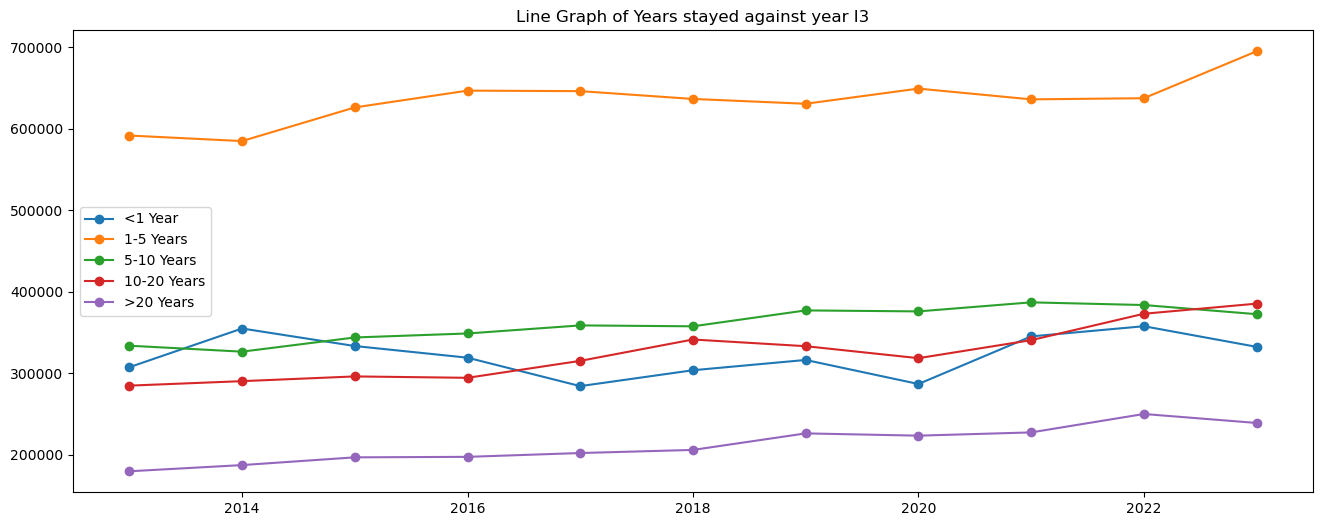

In [53]:
X = total_data.index
columns = total_data.columns

plt.figure(figsize=(16 , 6))

for i , col in enumerate(columns):
  if col == 'Total':
    continue
  data = total_data[col]
  plt.plot(X , data , marker='o' , label=col)

plt.title(f'Line Graph of Years stayed against year I3')
plt.legend()
plt.show()

Observation
<ul>
    <li>'1-5 Years' has the highest amount of employees across all years and has been steadily increasing</li>
    <li>'5-10 Years', '10-20 Years' and '>20 Years' has been increasing slightly</li>
    <li>While '< 1 Year' increased in 2014, decreased from then to 2020, and seems to increase slightly to 2023</li>
</ul>

In [ ]:
%run MOMI4.ipynb

momi4_no_total = df.copy()
momi4_no_total.drop(labels=[37 , 40], axis=0 , inplace=True)
momi4_no_total.set_index('Industry (SSIC 2020)' , inplace=True)
momi4_no_total

,Total,<1 Year,1-5 Years,5-10 Years,10-20 Years,>20 Years
Industry (SSIC 2020),,,,,,
C Manufacturing,198500,22800,52900,35200,49500,38100
F Construction,79100,10200,25800,15400,16600,11200
G Wholesale & Retail Trade,295200,44000,98300,56500,59800,36600
H Transportation & Storage,143900,21500,40700,28400,29500,23800
I Accommodation & Food Services,121800,29600,50600,20000,13800,7800
J Information & Communications,124000,26500,55900,20800,14700,6100
K Financial & Insurance Services,213700,41300,75500,41400,35700,19700
L Real Estate Services,37000,5900,14800,6300,5700,4400
M Professional Services,175300,32400,69800,30800,28700,13600


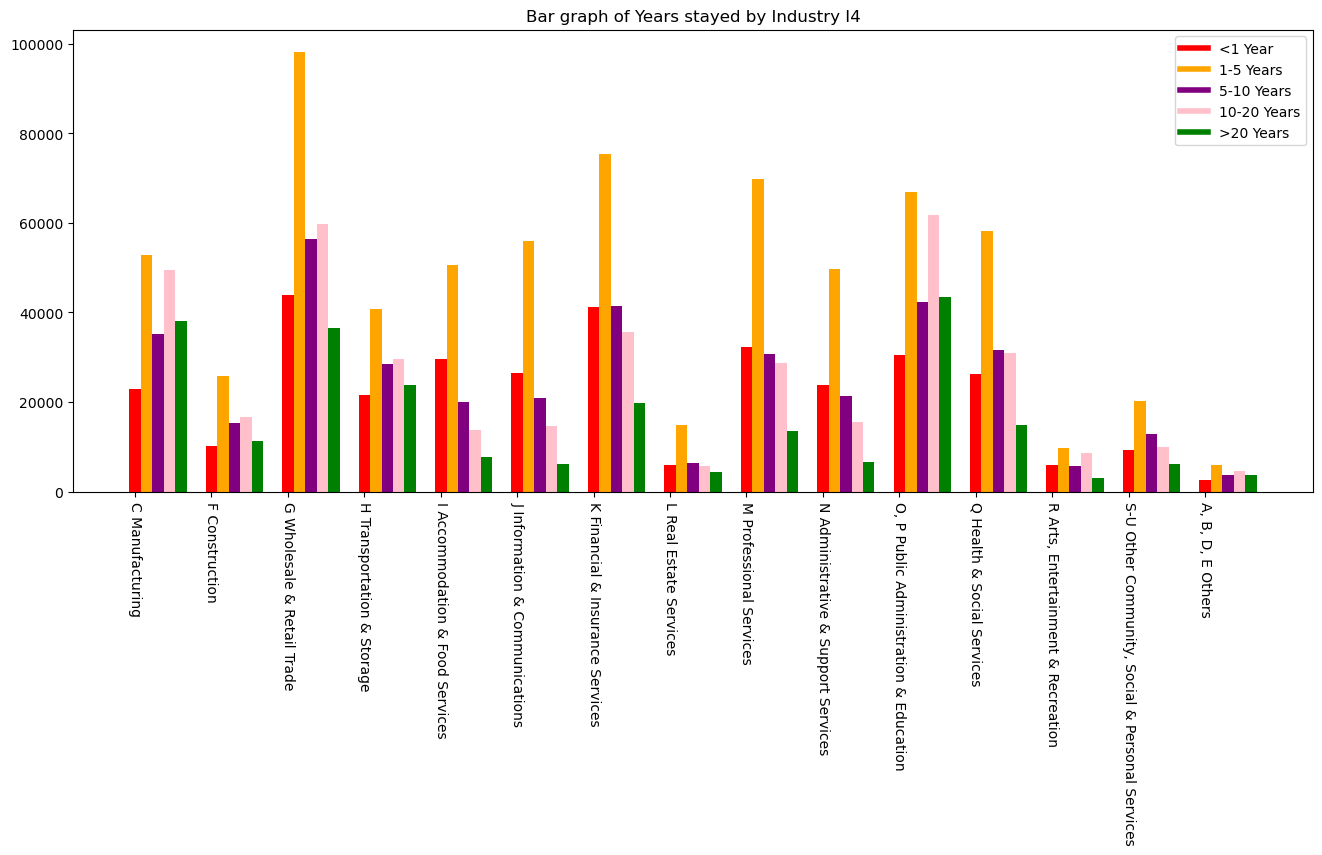

In [ ]:
indexes = momi4_no_total.index
colors = [
  'red',
  'orange',
  'purple',
  'pink',
  'green'  
]

plt.figure(figsize=(16 , 6))

for i , industry in enumerate(indexes):
  data = momi4_no_total.loc[[industry] , :]
  cols = data.columns
  
  for x , col in enumerate(cols):
    if col == 'Total':
      continue
    plt.bar(i + 0.15 * x , data[col] , width=0.15 , color=colors[x -1]) 

    
handles = [
    plt.Line2D([0], [0], color='red', lw=4),  
    plt.Line2D([0], [0], color='orange', lw=4),  
    plt.Line2D([0], [0], color='purple', lw=4),  
    plt.Line2D([0], [0], color='pink', lw=4),  
    plt.Line2D([0], [0], color='green', lw=4),  
]

plt.title(f'Bar graph of Years stayed by Industry I4')
plt.xticks(np.arange(len(indexes)) + 0.15 , indexes , rotation=270)
plt.legend(handles=handles , labels=list(momi4_no_total.columns[1:]))
plt.show()

Observation
<ul>
    <li>'Wholesale & Retail Trade', 'Financial & Insurance Services' and 'Professional Services' have the highest proportion of employees leaving in 1-5 Years</li>
    <li>'Manufacturing', 'Wholesale & Retail Trade' and 'Public Administration and Education' have higher proportions of employees staying longer periods 5-20+ years</li>
</ul>